# ENGR 1330 – Computational Thinking and Data Science

# Machine Learning

Machine learning (ML) is the process of  building algorithms that are capable of ‘learning’ from data. ML takes a dataset and attempts to fit a model to the data such that the model can make accurate predictions on data that is either unknown or to fill in missing parts of the data. An example of this would be using ML to predict what videos a user might want to watch based on what they viewed previously. 

The purpose of a Machine learning system is to:
- Fit a model to a dataset 
- Use the model to make predictions about the future
- Use the model to fill in missing data 

This project will develop scripts to train a machine learning model. 

# Background
Scikit will be used to generate and train the model along with making the predictions. Scikit is a common machine learning library and is a good place to start learning about machine learning. The model type for this project will be Support Vector Machine (SVM) that takes in a vector with each element of the vector representing a variable. 

To learn more about Scikit SVM models read the documentation found here:
https://scikit-learn.org/stable/modules/svm.html#svm

# Objective(s):
- Train a model using prvided dataset with a 80/20 training/validation split.
- test your model against the validation set
- predict the future

# Presentation
Prepare a 5-8 min presentation that will be given to the class. 
The presentation should include:
- Description of the dataset used
- Histogram of the weights
- A graph of the data and model
- Accuracy of the model when tested against the validation set
- Graph of the data along with the predicted data
- Predict data using an x that you come up with that is not included in the data
- Expect to be asked questions about the data and model as well as what variables played the largest role.

# Submission 
- Your presentation slides, jupyter notebook, and pdf of the jupyter notebook must be submitted BEFORE the your present.

# Libraries 
- numpy
- pandas
- matplotlib
- scikit

# Importing Necessary Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn import svm
from sklearn import preprocessing

In [5]:
# Importing Necessary Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn import svm

## Data
- using statistics and graphs describe your data

In [6]:
# read in the data

df = pd.read_csv("Final_Database.csv")

# Dropping the column that we do not need
#df.drop('Birth Number', inplace=True, axis=1)

# Showing first five rows 
df.head()

,Date,Raw_Material_Usage_(kg),Production_Volume,Production_Efficiency_(%),Recycling_Efforts_(%),Packaging_Material_Usage_(kg),Energy_Consumption_(kWh),Transportation_Waste_(kg),End_of_Life_Waste_(kg),Sell_In_Quantity,Sell_Out_Quantity,Inflation_Rate,Disposable_Income,Sell_Out_to_Sell_In_Ratio,Profit
0,1/1/1960,784,4026,82.700913,47.306661,113,41532,85,549,149.756886,120.637492,0.030215,42984,0.81,123.456790
1,1/2/1960,581,4167,92.885243,26.197983,185,10078,41,158,389.645232,270.394378,0.030215,42984,0.69,144.927536
2,1/3/1960,160,1023,89.484823,34.943286,92,26099,30,907,321.699978,253.754724,0.030215,42984,0.79,126.582279
3,1/4/1960,681,1913,86.134011,14.717735,104,35365,19,177,415.991351,388.258594,0.030215,42984,0.93,107.526882
4,1/5/1960,108,1041,72.762102,16.286755,144,19439,37,554,289.807308,171.943092,0.030215,42984,0.59,169.491525


In [8]:
df1 = pd.read_csv("ntest.csv")
df1.head()

,Month of the Year,Raw Material,Packaging Material,Energy Consumption,Waste in Transportation,Inflation,Disposable Income,Production,Sold
0,1.0,162170.0,31977.0,342613.0,28551.0,0.05,4177.0,1142042.0,38315.0
1,2.0,249466.0,49190.0,527041.0,43920.0,0.04,3623.0,1756802.0,402525.0
2,3.0,202309.0,39892.0,427414.0,35618.0,0.03,3431.0,1424714.0,451577.0
3,4.0,155694.0,30700.0,328932.0,27411.0,0.02,2874.0,1096439.0,678557.0
4,5.0,179314.0,35358.0,378833.0,31569.0,0.01,2666.0,1262777.0,1258730.0


In [8]:
# Produce descriptive statistics of the data

df.describe()

,Date,Raw_Material_Usage_(kg),Production_Volume,Production_Efficiency_(%),Recycling_Efforts_(%),Packaging_Material_Usage_(kg),Energy_Consumption_(kWh),Transportation_Waste_(kg),End_of_Life_Waste_(kg),Sell_In_Quantity,Sell_Out_Quantity,Inflation_Rate,Disposable_Income,Disposable_income,Sell_Out_to_Sell_In_Ratio,Profit
count,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000
mean,11635.500000,551.243833,2985.243060,82.478337,29.964442,124.724366,29998.546755,54.967125,550.438075,387.127589,225.730382,0.031218,59804.957155,163.849198,0.601861,218.063367
std,6717.614718,259.037192,1159.768137,7.201621,11.562292,43.526524,11611.263312,26.338943,261.052464,120.097278,105.015889,0.009226,14036.381495,38.455840,0.243079,154.322600
min,1.000000,100.000000,1000.000000,70.000534,10.000145,50.000000,10000.000000,10.000000,100.000000,132.000000,40.000000,0.021062,35765.000000,97.986301,0.070000,100.000000
25%,5818.250000,327.000000,1973.000000,76.267206,19.930375,87.000000,19933.750000,32.000000,325.000000,302.000000,146.000000,0.022974,47042.000000,128.882192,0.410000,123.456790
50%,11635.500000,554.000000,2983.000000,82.457520,29.988281,125.000000,30083.000000,55.000000,551.000000,377.000000,218.000000,0.026260,61505.000000,168.506849,0.620000,161.290323
75%,17452.750000,774.000000,3984.000000,88.699974,39.954093,162.000000,40021.750000,78.000000,776.000000,460.000000,299.000000,0.041449,74673.000000,204.583562,0.810000,243.902439
max,23270.000000,1000.000000,5000.000000,94.998818,49.999853,200.000000,50000.000000,100.000000,1000.000000,784.000000,523.000000,0.049131,78282.000000,214.471233,1.000000,1428.571429


In [9]:
# Calculating and showing the correlation between columns 

df.corr()

,Date,Raw_Material_Usage_(kg),Production_Volume,Production_Efficiency_(%),Recycling_Efforts_(%),Packaging_Material_Usage_(kg),Energy_Consumption_(kWh),Transportation_Waste_(kg),End_of_Life_Waste_(kg),Sell_In_Quantity,Sell_Out_Quantity,Inflation_Rate,Disposable_Income,Disposable_income,Sell_Out_to_Sell_In_Ratio,Profit
Date,1.000000,0.018441,0.001682,0.000494,-0.000642,-0.001907,-0.010209,0.005496,-0.002294,0.003771,-0.004455,0.002744,0.003587,0.003587,-0.007388,0.010264
Raw_Material_Usage_(kg),0.018441,1.000000,0.005738,0.000051,-0.000163,0.001533,-0.009361,-0.001029,0.001381,-0.003724,0.002195,0.005631,-0.003561,-0.003561,0.005594,-0.000484
Production_Volume,0.001682,0.005738,1.000000,0.014317,0.008464,0.001163,0.003714,0.010692,0.001757,-0.002740,0.007631,0.000161,-0.011826,-0.011826,0.012132,-0.009272
Production_Efficiency_(%),0.000494,0.000051,0.014317,1.000000,-0.001756,-0.003837,-0.005897,0.000853,0.001104,-0.001830,0.010070,0.003587,-0.002978,-0.002978,0.012238,-0.000669
Recycling_Efforts_(%),-0.000642,-0.000163,0.008464,-0.001756,1.000000,0.007278,0.009033,0.001744,0.006627,0.006817,-0.002982,-0.000525,0.004832,0.004832,-0.008821,0.013407
Packaging_Material_Usage_(kg),-0.001907,0.001533,0.001163,-0.003837,0.007278,1.000000,0.000798,-0.001937,0.001751,0.005058,0.004317,0.008152,0.006682,0.006682,0.002197,-0.002446
Energy_Consumption_(kWh),-0.010209,-0.009361,0.003714,-0.005897,0.009033,0.000798,1.000000,-0.003617,0.005018,0.002251,0.003593,0.003654,-0.000511,-0.000511,0.001154,-0.006216
Transportation_Waste_(kg),0.005496,-0.001029,0.010692,0.000853,0.001744,-0.001937,-0.003617,1.000000,0.013163,-0.002805,-0.004718,0.008351,0.000601,0.000601,-0.002360,0.000954
End_of_Life_Waste_(kg),-0.002294,0.001381,0.001757,0.001104,0.006627,0.001751,0.005018,0.013163,1.000000,0.008248,0.003857,0.003155,0.004352,0.004352,-0.001377,-0.001822
Sell_In_Quantity,0.003771,-0.003724,-0.002740,-0.001830,0.006817,0.005058,0.002251,-0.002805,0.008248,1.000000,0.403708,0.035676,0.514835,0.514835,-0.248830,0.251710


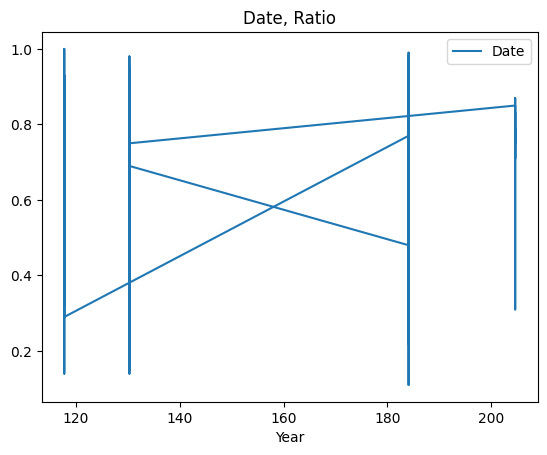

In [22]:
# Plotting the relation between General Fertility Rate, Crude Birth Rate and Year to understand our data

plt.plot(df["Disposable_income"][:100], df["Sell_Out_to_Sell_In_Ratio"][:100])
#plt.plot(df["Date"][:100], df["Transportation_Waste_(kg)"][:100] + df["End_of_Life_Waste_(kg)"][:100])
plt.xlabel("Year")
plt.title("Date, Ratio")
plt.legend(["Date", "Total Solid Waste"])
plt.show()

In [31]:
# Writing the functions that we will us to normalize the data

#def normalize_year(x):
 #   a = x - df["Year"].min()
        
  #  return a

def normalize_di(x):
    a = (x / df["Disposable_income"].max())
    
    return a

def normalize_cr(x):
    a = (x - df["Crude Birth Rate"].mean()) / df["Crude Birth Rate"].std()
    
    return a

In [32]:
# Normalizing the data using the functions we wrote

df["Normalized Disposable_income"] = df["Disposable_income"].apply(normalize_di)
#df["Normalized General Fertility Rate"] = df["General Fertility Rate"].apply(normalize_fr)
#df["Normalized Crude Birth Rate"] = df["Crude Birth Rate"].apply(normalize_cr)
df

,Date,Raw_Material_Usage_(kg),Production_Volume,Production_Efficiency_(%),Recycling_Efforts_(%),Packaging_Material_Usage_(kg),Energy_Consumption_(kWh),Transportation_Waste_(kg),End_of_Life_Waste_(kg),Sell_In_Quantity,Sell_Out_Quantity,Inflation_Rate,Disposable_Income,Disposable_income,Sell_Out_to_Sell_In_Ratio,Profit,Normalized Disposable_income
0,1,784,4026,82.700913,47.306661,113,41532,85,549,150,121,0.030215,42984,117.764384,0.81,123.456790,0.549092
1,2,581,4167,92.885243,26.197983,185,10078,41,158,390,270,0.030215,42984,117.764384,0.69,144.927536,0.549092
2,3,160,1023,89.484823,34.943286,92,26099,30,907,322,254,0.030215,42984,117.764384,0.79,126.582279,0.549092
3,4,681,1913,86.134011,14.717735,104,35365,19,177,416,388,0.030215,42984,117.764384,0.93,107.526882,0.549092
4,5,108,1041,72.762102,16.286755,144,19439,37,554,290,172,0.030215,42984,117.764384,0.59,169.491525,0.549092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23265,23266,883,2628,93.680287,21.825017,105,32340,43,544,368,357,0.026260,47042,128.882192,0.97,103.092783,0.600930
23266,23267,542,3976,76.191049,12.370325,73,12471,76,994,374,103,0.026260,47042,128.882192,0.28,357.142857,0.600930
23267,23268,900,1653,78.131876,44.526480,110,22653,27,916,258,143,0.026260,47042,128.882192,0.56,178.571429,0.600930
23268,23269,128,3578,86.103341,39.044221,136,46512,14,582,178,123,0.026260,47042,128.882192,0.69,144.927536,0.600930


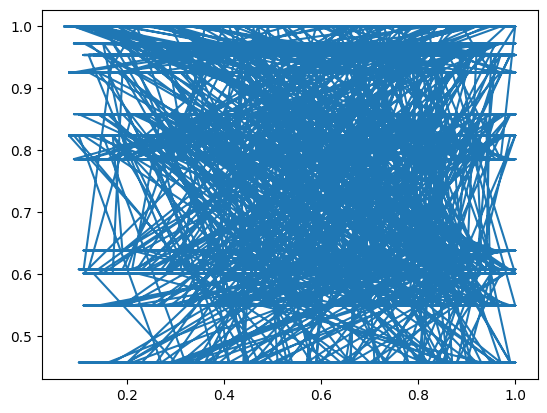

In [34]:
# Plotting the relation between Normalized General Fertility Rate, Crude Birth Rate and Year

plt.plot(df["Sell_Out_to_Sell_In_Ratio"], df["Normalized Disposable_income"])
#plt.scatter(df["Normalized Year"], df["Normalized Crude Birth Rate"])
#plt.xlabel("Normalized Year")
#plt.title("Normalized General Fertility Rate, Crude Birth Rate and Year")
#plt.legend(["Normalized General Fertility Rate", "Normalized Crude Birth Rate"])
plt.show()

## Machine Learning
- use the code to generate a model
- start by pick data to use as your x and y
- split your data into a training set (80) and a validation set (20)

In [108]:
# Converting our Xs and Y to numpy array 

import numpy as np

# Assuming df is your DataFrame
x_data = np.column_stack((
    df["Packaging_Material_Usage_(kg)"],
    df["Raw_Material_Usage_(kg)"],
    df["Date"],
    df["Inflation_Rate"],
    df["Disposable_income"]
))

y_data = np.column_stack((
    df["Sell_In_Quantity"],
    
))

# Now, x_data and y_data are NumPy arrays with the specified columns


# Now, x_data and y_data are NumPy arrays containing the specified columns


In [109]:
# Split the data into data_train and data_val
# Spliting the data for the first model to predict General Fertility Rate from Year and Crude Birth Rate

X = x_data
y = y_data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [110]:
# save your x and y for the training/validation sets
# use x_train/y_train and x_val,y_val

x_train = X_train 
y_train = y_train 
x_val = X_test
y_val = y_test 

In [105]:
print("Shape of x_train:", x_train.shape)
#y_train = y_train.reshape((18616, 5))
print("Shape of y_train:", y_train.shape)

# Print the first few rows to check alignment
#print("x_train sample:")
#print(x_train[:5])


#print("y_train sample:")
#print(y_train[:5])


Shape of x_train: (18616, 5)
Shape of y_train: (18616, 2)


In [111]:
# Using Support Vector Regression as our ML algorithm 

model_regression = svm.SVR()
model_regression.fit(x_train, y_train)

c:\Users\lmqr2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [114]:
import pickle
s = pickle.dumps(model_regression)

In [117]:
with open('workfile', 'wb') as f:
    f.write(s)


In [127]:
with open('workfile', 'rb') as f:
    copy_of_model = pickle.loads(f.read())
    pm = copy_of_model.predict(X_test) 
    print(copy_of_model.predict(X_test))
    print(y_test)


[376.66015291 376.58964266 380.66528646 ... 376.34372524 376.55372409
 380.63072588]
[[576]
 [248]
 [368]
 ...
 [233]
 [394]
 [615]]


ValueError: x and y must have same first dimension, but have shapes (23270,) and (4654,)

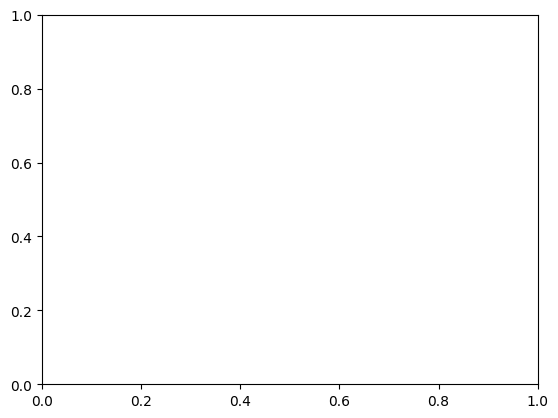

In [128]:
plt.plot(df["Date"], )

## Machine Learning Testing
- use a loop to test your model against the validation set you created
- make a graph with a scater plot of the data and a plot of the model

In [13]:
# use this loop to test your model, you will need to talk about the error

error = 0
z = len(x_val)

for k in range(z):
    data = x_data[k]
    y_pred = model_regression.predict([data])
    error = error + (y_pred[0] - y_val[k])**2 
MSE = error / z
RMSE = np.sqrt(MSE)

In [14]:
# Printing Root-Mean-Square Error (RMSE) error

print("The Root-Mean-Square Error for our model is:", RMSE)

The Root-Mean-Square Error for our model is: 1.5808558990622523


In [15]:
# Appending our predicted General Fertility Rate to our main dataset 

a = model_regression.predict(X)

df["Predicted General Fertility Rate"] = a*126.8
df

,Year,General Fertility Rate,Crude Birth Rate,Normalized Year,Normalized General Fertility Rate,Normalized Crude Birth Rate,Predicted General Fertility Rate
0,1909,126.8,30.0,0,1.747033,1.930060,208.788435
1,1910,126.8,30.1,1,1.747033,1.948650,203.594501
2,1911,126.3,29.9,2,1.724885,1.911469,198.210498
3,1912,125.8,29.8,3,1.702736,1.892878,192.785505
4,1913,124.7,29.5,4,1.654009,1.837106,187.230351
...,...,...,...,...,...,...,...
105,2014,62.9,12.5,105,-1.083545,-1.323325,-125.271776
106,2015,62.5,12.4,106,-1.101264,-1.341915,-123.487906
107,2016,62.0,12.2,107,-1.123412,-1.379097,-121.577570
108,2017,60.3,11.8,108,-1.198717,-1.453460,-119.555992


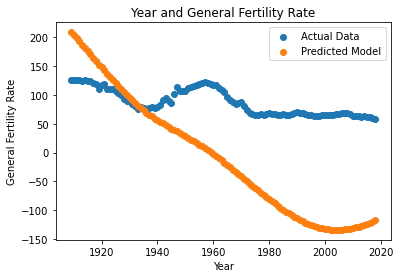

In [16]:
# Creating a scatter plot of our data and the model.
# We multiplied each data point with the maximum value to change our values from normalized back to our actual values

plt.scatter(df["Year"], df["General Fertility Rate"])
plt.scatter(df["Year"], df["Predicted General Fertility Rate"])
plt.xlabel("Year")
plt.ylabel("General Fertility Rate")
plt.title("Year and General Fertility Rate")
plt.legend(["Actual Data", "Predicted Model"])
plt.show()

# Training the Second Model to Predict Crude Birth Rate from Year

In [17]:
# Converting our X and Y of the second model to numpy array 

x_data1 = np.array(df[["Normalized Year"]])
y_data1 = np.array(df["Normalized Crude Birth Rate"])

In [18]:
# Split the data into data_train and data_val
# Spliting the data for the second model to predict Crude Birth Rate form Year

X1 = x_data1
y1 = y_data1


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)

In [19]:
# save your x and y for the training/validation sets
# use x_train/y_train and x_val,y_val

x_train1 = X_train1 
y_train1 = y_train1 
x_val1 = X_test1
y_val1 = y_test1

In [20]:
# Using Support Vector Regression as our ML algorithm 

model_regression_cr = svm.SVR()
model_regression_cr.fit(x_train1, y_train1.ravel())

SVR()

In [21]:
# use this loop to test your model, you will need to talk about the error

error1 = 0
z1 = len(x_val1)

for k in range(z1):
    data1 = x_data1[k]
    y_pred1 = model_regression_cr.predict([data1])
    error1 = error1 + (y_pred1[0] - y_val1[k])**2 
MSE1 = error1 / z1
RMSE1 = np.sqrt(MSE1)

In [22]:
# Printing Root-Mean-Square Error (RMSE) error for our second model

print("The Root-Mean-Square Error for our second model is:",RMSE1)

The Root-Mean-Square Error for our second model is: 1.7750089500428432


In [23]:
# Getting our Predicted Crude Birth Rate and adding it as a new column in our data set
# We multiply our Predicted Crude Birth Rate by 30.1 to get the actual value, because we had normalized our data by dividing it with 30.1

df["Predicted Crude Birth Rate"] = model_regression_cr.predict(x_data1)*30.1
df

,Year,General Fertility Rate,Crude Birth Rate,Normalized Year,Normalized General Fertility Rate,Normalized Crude Birth Rate,Predicted General Fertility Rate,Predicted Crude Birth Rate
0,1909,126.8,30.0,0,1.747033,1.930060,208.788435,63.261700
1,1910,126.8,30.1,1,1.747033,1.948650,203.594501,61.666479
2,1911,126.3,29.9,2,1.724885,1.911469,198.210498,59.890463
3,1912,125.8,29.8,3,1.702736,1.892878,192.785505,57.948306
4,1913,124.7,29.5,4,1.654009,1.837106,187.230351,55.856736
...,...,...,...,...,...,...,...,...
105,2014,62.9,12.5,105,-1.083545,-1.323325,-125.271776,-37.979733
106,2015,62.5,12.4,106,-1.101264,-1.341915,-123.487906,-38.669161
107,2016,62.0,12.2,107,-1.123412,-1.379097,-121.577570,-39.305243
108,2017,60.3,11.8,108,-1.198717,-1.453460,-119.555992,-39.878230


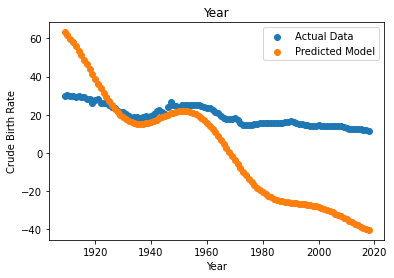

In [24]:
# Creating a scatter plot of our data and the model.
# We multiplied each data point with the maximum value to change our values from normalized back to our actual values

plt.scatter(df["Year"], df["Crude Birth Rate"])
plt.scatter(df["Year"], df["Predicted Crude Birth Rate"])
plt.xlabel("Year")
plt.ylabel("Crude Birth Rate")
plt.title("Year")
plt.legend(["Actual Data", "Predicted Model"])
plt.show()

# Predicting the Future 

- Both of our models are trained. Now we use both of them to predict the General Fertility Rate for the next ten years

In [25]:
# First We have to give the next then years and store them in a numpy array

year_pre = np.reshape(np.array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119]), (-1, 1))
crude_pre = model_regression_cr.predict(year_pre)

In [26]:
# We stored our future years and crude birth rates in one numpy array

year_pre = year_pre.tolist()
crude_pre = crude_pre.tolist()

for i in range(10):
    p = crude_pre[i]
    year_pre[i].append(p)
    
year_pre_arr = np.array(year_pre)

In [27]:
# Second we have to feed the years and their corresponding crude birth rates to our model to predict general fertility rate for the next ten years

gfertility_pre = model_regression.predict(year_pre_arr)

# Converting our normalized values form normalized back to original values
gfertility_pre = gfertility_pre*126.8
gfertility_pre = gfertility_pre.tolist()

crude_pre1 = [i * 30.1 for i in crude_pre]

In [28]:
# Appending our predicted future values back to our original dataframe

df1 = {"Year": [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028], "General Fertility Rate": gfertility_pre, 
      "Crude Birth Rate": crude_pre1}

df1 = pd.DataFrame(df1)

# Droping the columns we no longer need from our original dataframe
df_future = df.drop(["Normalized Year", "Normalized General Fertility Rate", "Normalized Crude Birth Rate", 
                    "Predicted General Fertility Rate", "Predicted Crude Birth Rate"], axis=1)

df_future = df_future.append(df1)
df_future

C:\Users\shaye\AppData\Local\Temp\ipykernel_14436\2017534226.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_future = df_future.append(df1)


,Year,General Fertility Rate,Crude Birth Rate
0,1909,126.800000,30.000000
1,1910,126.800000,30.100000
2,1911,126.300000,29.900000
3,1912,125.800000,29.800000
4,1913,124.700000,29.500000
...,...,...,...
5,2024,-102.224124,-41.474241
6,2025,-99.434728,-41.295064
7,2026,-96.588768,-41.006992
8,2027,-93.693885,-40.610539


In [29]:
# Showing predicted General Fertility Rate for the next ten years

df_future.tail(15)

,Year,General Fertility Rate,Crude Birth Rate
105,2014,62.900000,12.500000
106,2015,62.500000,12.400000
107,2016,62.000000,12.200000
108,2017,60.300000,11.800000
109,2018,59.100000,11.600000
0,2019,-115.043837,-40.799429
1,2020,-112.657319,-41.132024
2,2021,-110.173876,-41.370494
3,2022,-107.601747,-41.509578
4,2023,-104.949126,-41.545148


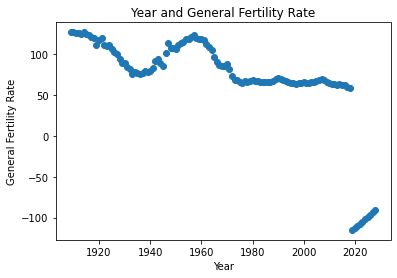

In [30]:
plt.scatter(df_future["Year"], df_future["General Fertility Rate"])
plt.xlabel("Year")
plt.ylabel("General Fertility Rate")
plt.title("Year and General Fertility Rate")
plt.show()